In [1]:
from validate_binary_model import ValidateBinaryModel
from load_data import LoadData
from hipe4ml.model_handler import ModelHandler
import json_tools
import plotting_tools
import os

In [2]:
json_file_name = "config.json"
model_name = "/Users/julnow/gsi/ml-pid-cbm/ml_pid_cbm/only_tof/binary/model_1.6_2.3_positive/model_1.6_2.3_positive"
n_workers = 10
lower_p, upper_p, is_anti = ValidateBinaryModel.parse_model_name("model_1.6_2.3_positive")
# loading test data
data_file_name = json_tools.load_file_name(json_file_name, "test")

loader = LoadData(data_file_name, json_file_name, lower_p, upper_p, is_anti)
# sigma selection
# loading model handler and applying on dataset
print(
    f"\nLoading data from {data_file_name}\nApplying model handler from {model_name}"
)
model_hdl = ModelHandler()
model_hdl.load_model_handler(model_name)
test_particles = loader.load_tree(model_handler=model_hdl, max_workers=n_workers)
# validate model object
validate = ValidateBinaryModel(
    lower_p, upper_p, is_anti, json_file_name, test_particles.get_data_frame()
)
# remap Pid to match output XGBoost format
validate.remap_names()
pid_variable_name = json_tools.load_var_name(json_file_name, "pid")
validate.xgb_preds(.5)


# # sigma selection for each particle type
# for pid in range(0, 3):
#     validate.sigma_selection(pid, 4)



Loading data from /Users/julnow/gsi/mgr/trees/PlainTree1M_URQMD_tof_primaries_12agev.root
Applying model handler from /Users/julnow/gsi/ml-pid-cbm/ml_pid_cbm/only_tof/binary/model_1.6_2.3_positive/model_1.6_2.3_positive

Loading tree from /Users/julnow/gsi/mgr/trees/PlainTree1M_URQMD_tof_primaries_12agev.root...


(array([2.927840e+05, 1.000000e+00, 6.750000e+02, 8.379000e+03,
        4.238000e+03, 7.830000e+03, 1.710700e+04, 1.635000e+03,
        1.989000e+03, 5.098006e+06]),
 array([2.78097486e-05, 1.00025021e-01, 2.00022221e-01, 3.00019443e-01,
        4.00016636e-01, 5.00013828e-01, 6.00011051e-01, 7.00008273e-01,
        8.00005496e-01, 9.00002658e-01, 9.99999881e-01]),
 <BarContainer object of 10 artists>)

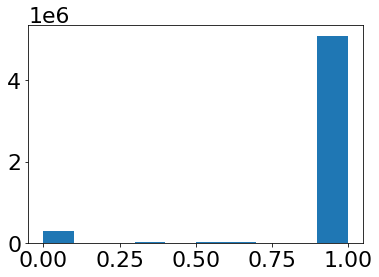

In [3]:
import matplotlib.pyplot as plt
from validate_binary_model import ValidateBinaryModel

plt.hist(validate.particles_df["model_output"])

In [4]:
df = validate.particles_df


In [5]:
df[df["Complex_pid"]==0]["model_output"]

200         0.000076
261         0.000088
300         0.000157
602         0.000089
793         0.314275
              ...   
44065478    0.000075
44065488    0.000098
44065552    0.000102
44065598    0.000129
44065720    0.000066
Name: model_output, Length: 311434, dtype: float32

(array([1.200000e+01, 1.000000e+00, 2.380000e+02, 3.214000e+03,
        1.994000e+03, 4.558000e+03, 1.030200e+04, 1.241000e+03,
        1.756000e+03, 5.097894e+06]),
 array([4.88842561e-05, 1.00043982e-01, 2.00039089e-01, 3.00034195e-01,
        4.00029272e-01, 5.00024378e-01, 6.00019455e-01, 7.00014591e-01,
        8.00009668e-01, 9.00004804e-01, 9.99999881e-01]),
 <BarContainer object of 10 artists>)

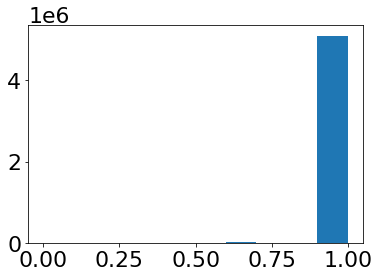

In [6]:
import matplotlib.pyplot as plt
plt.hist(df[df["Complex_pid"]!=0]["model_output"])

Confusion matrix, without normalization
[[ 300616   10818]
 [   5457 5115753]]


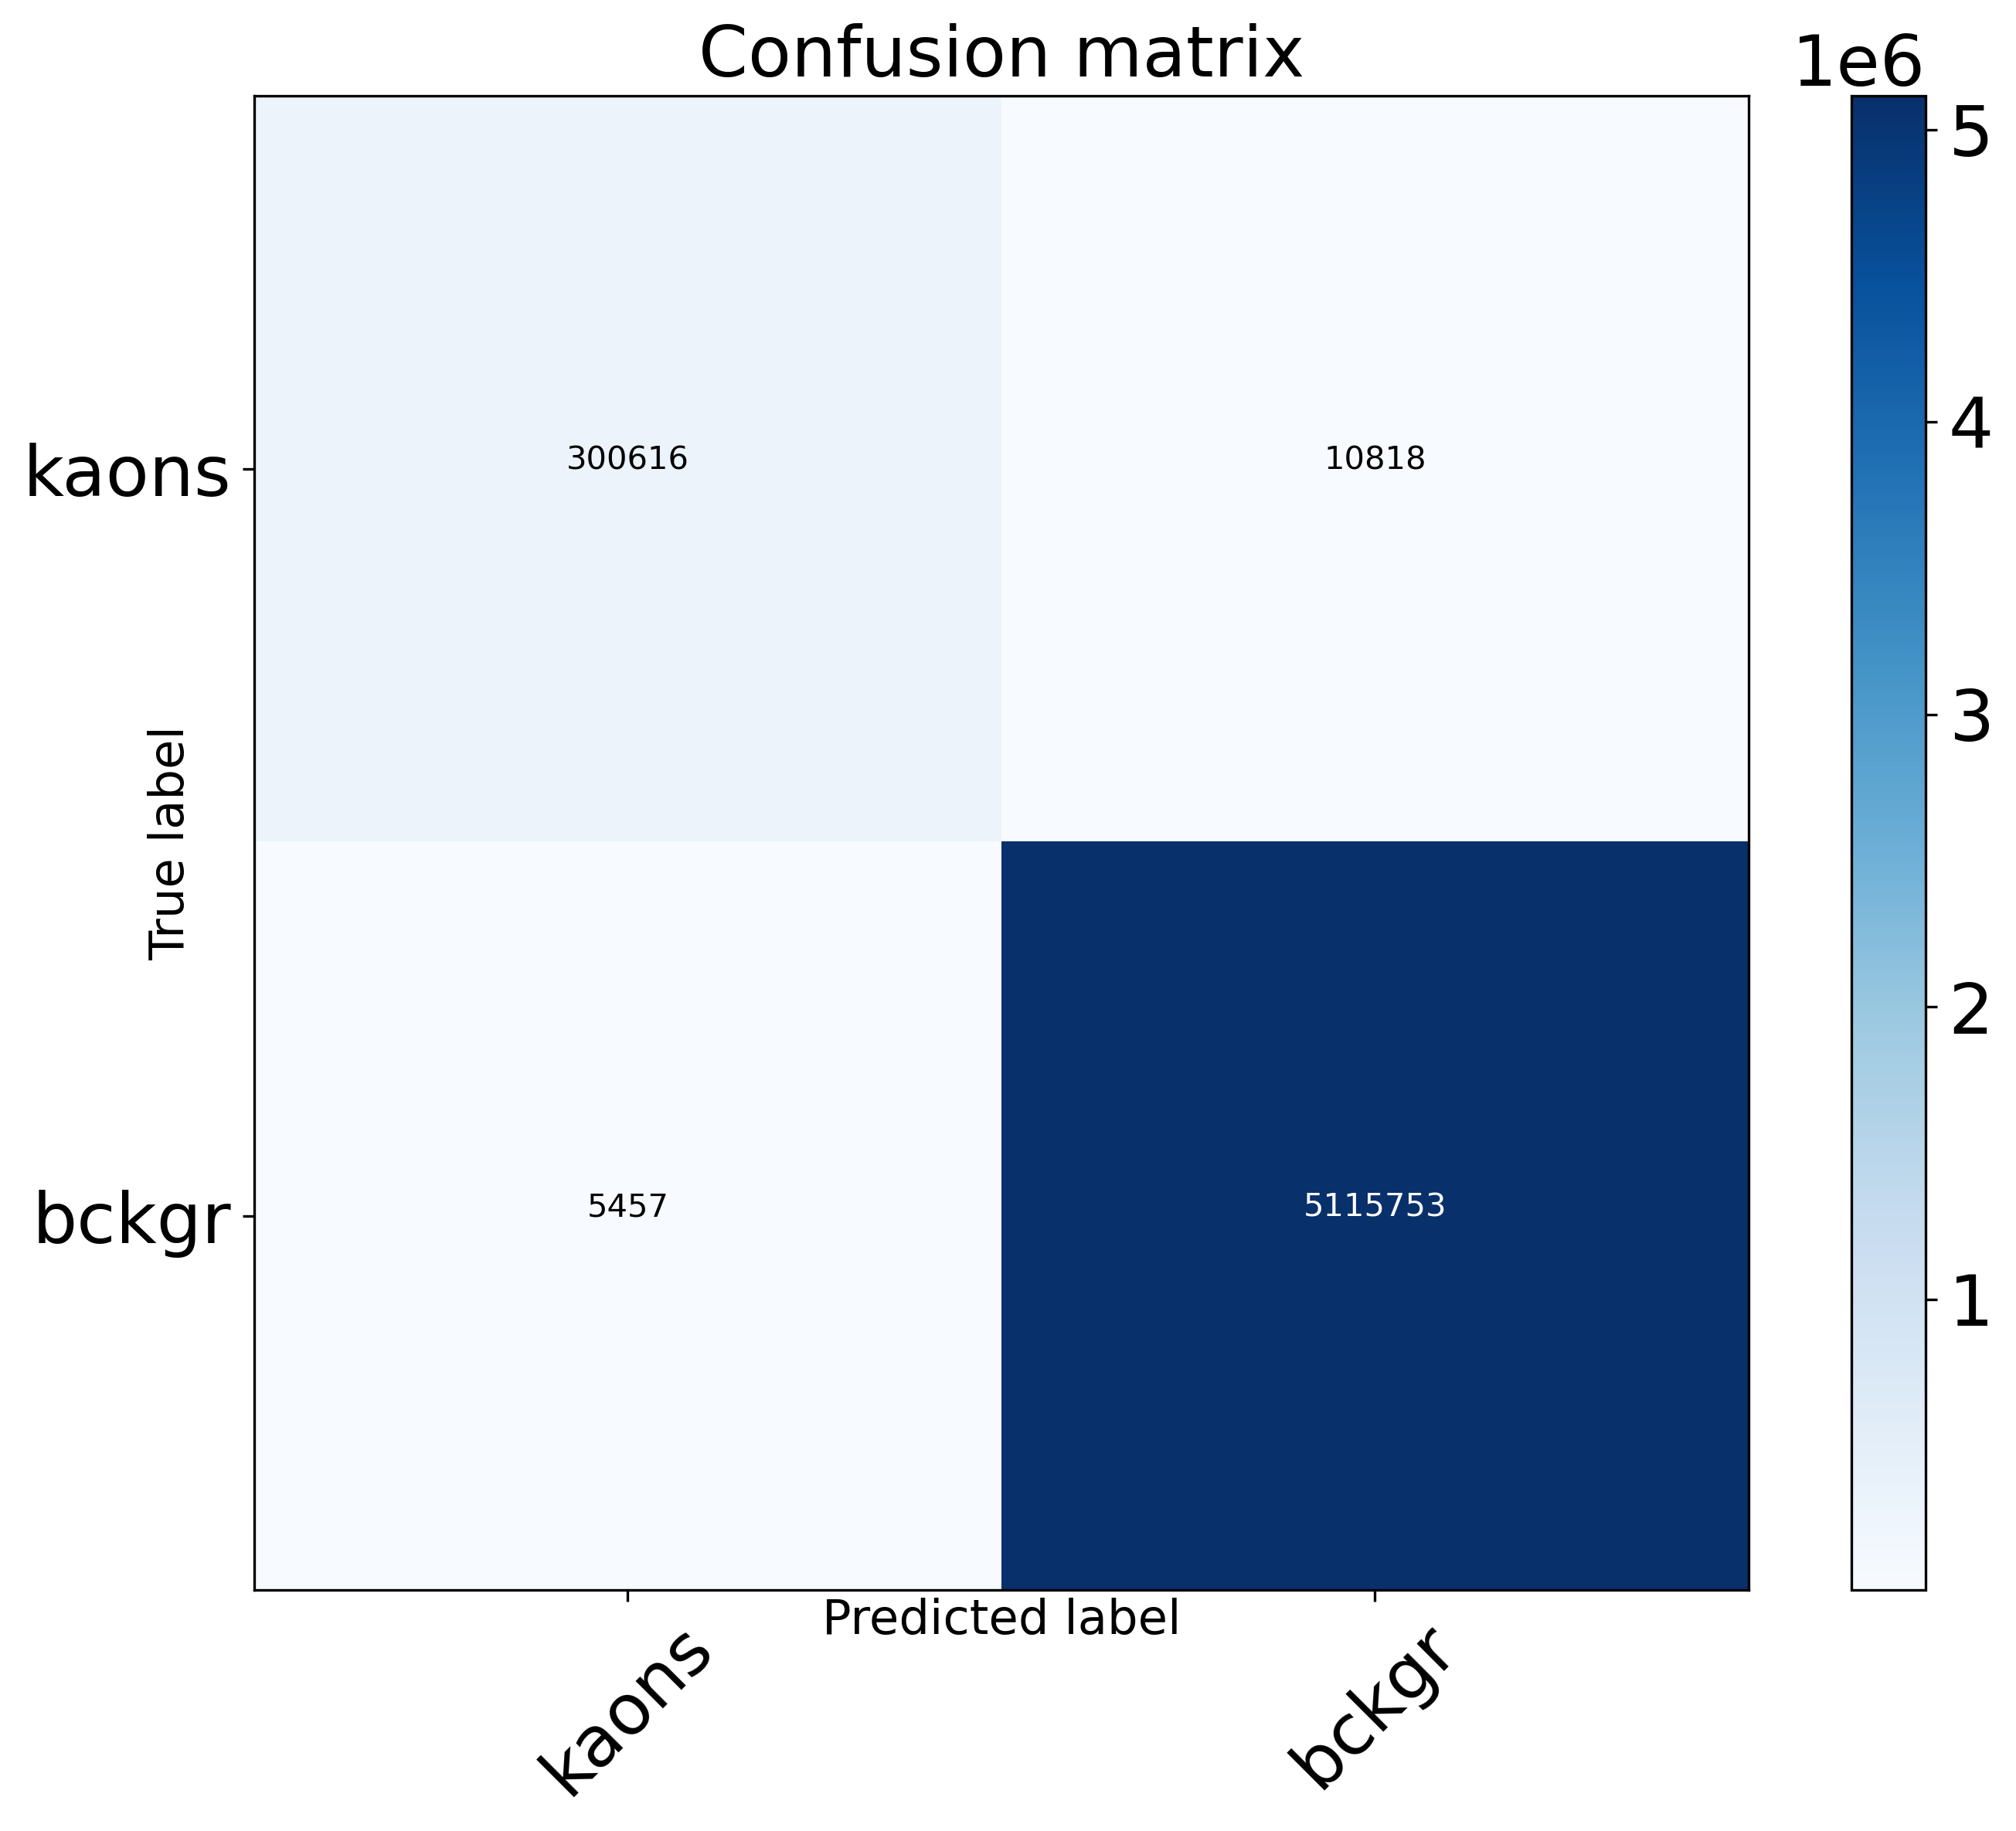

Normalized confusion matrix
[[0.97 0.03]
 [0.   1.  ]]


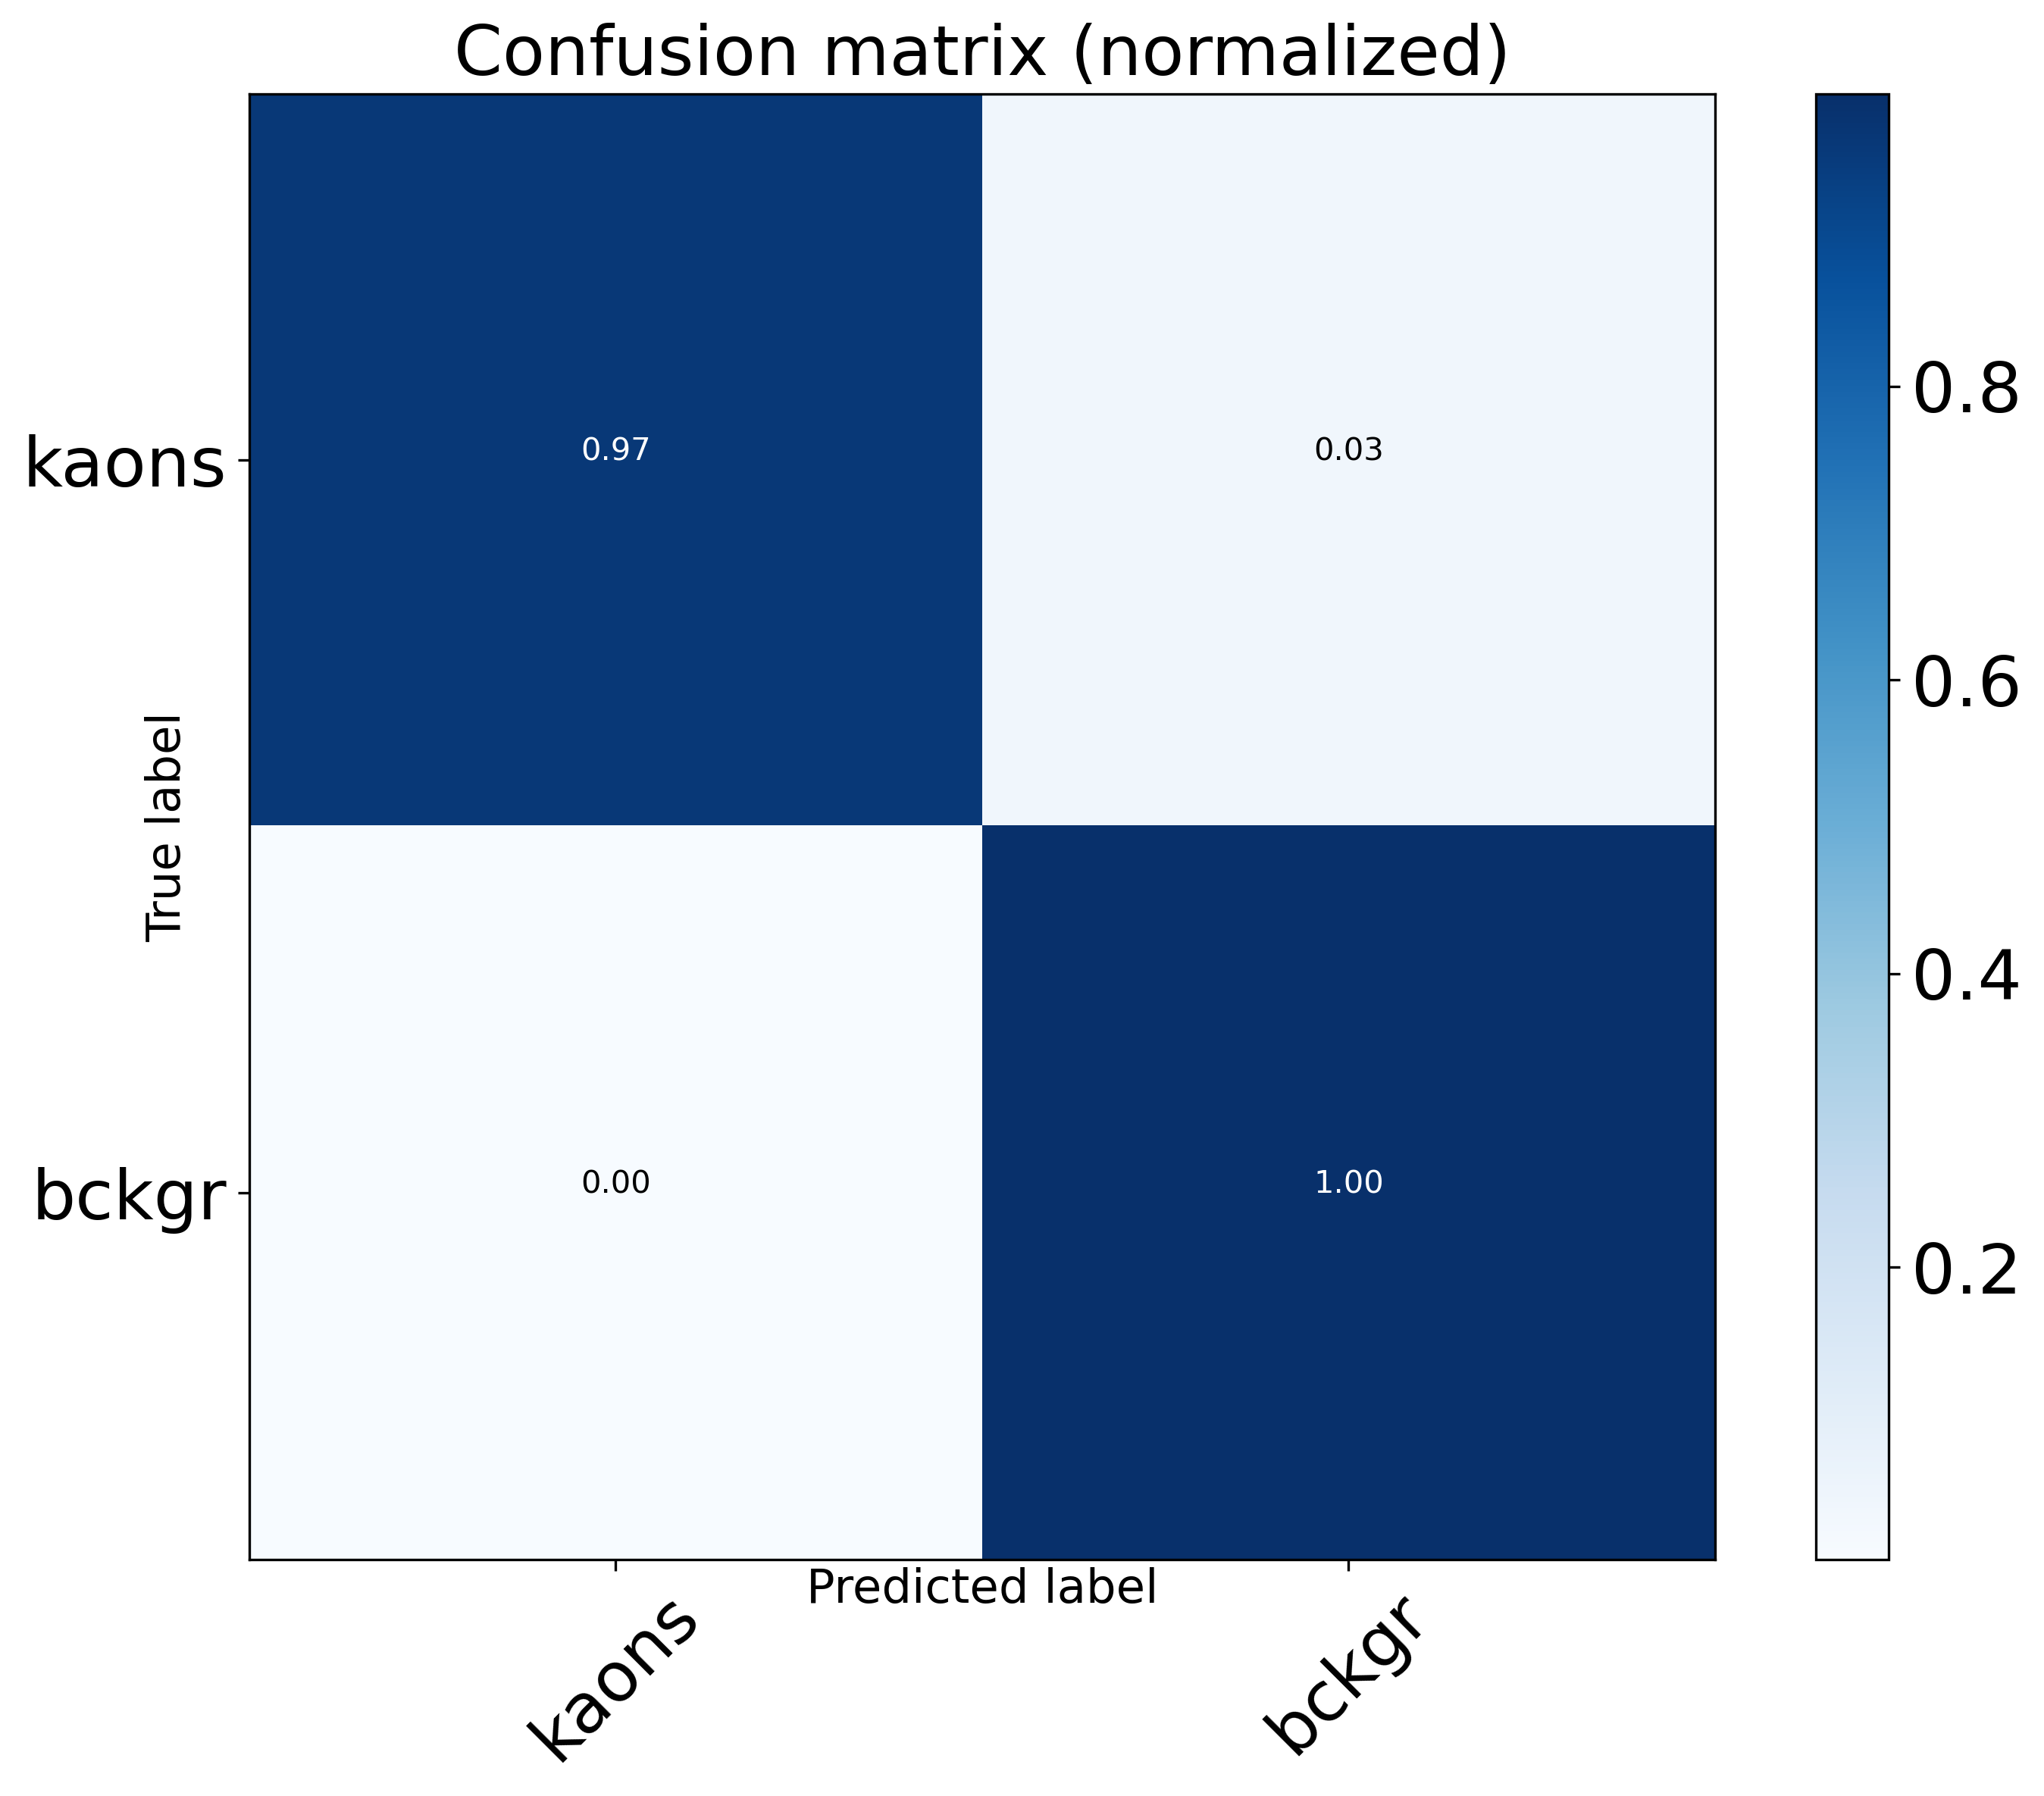

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [7]:
validate.confusion_matrix_and_stats(efficiency_filename=None, save_fig=False)

In [18]:
validate.xgb_preds(.4, .8, .4)


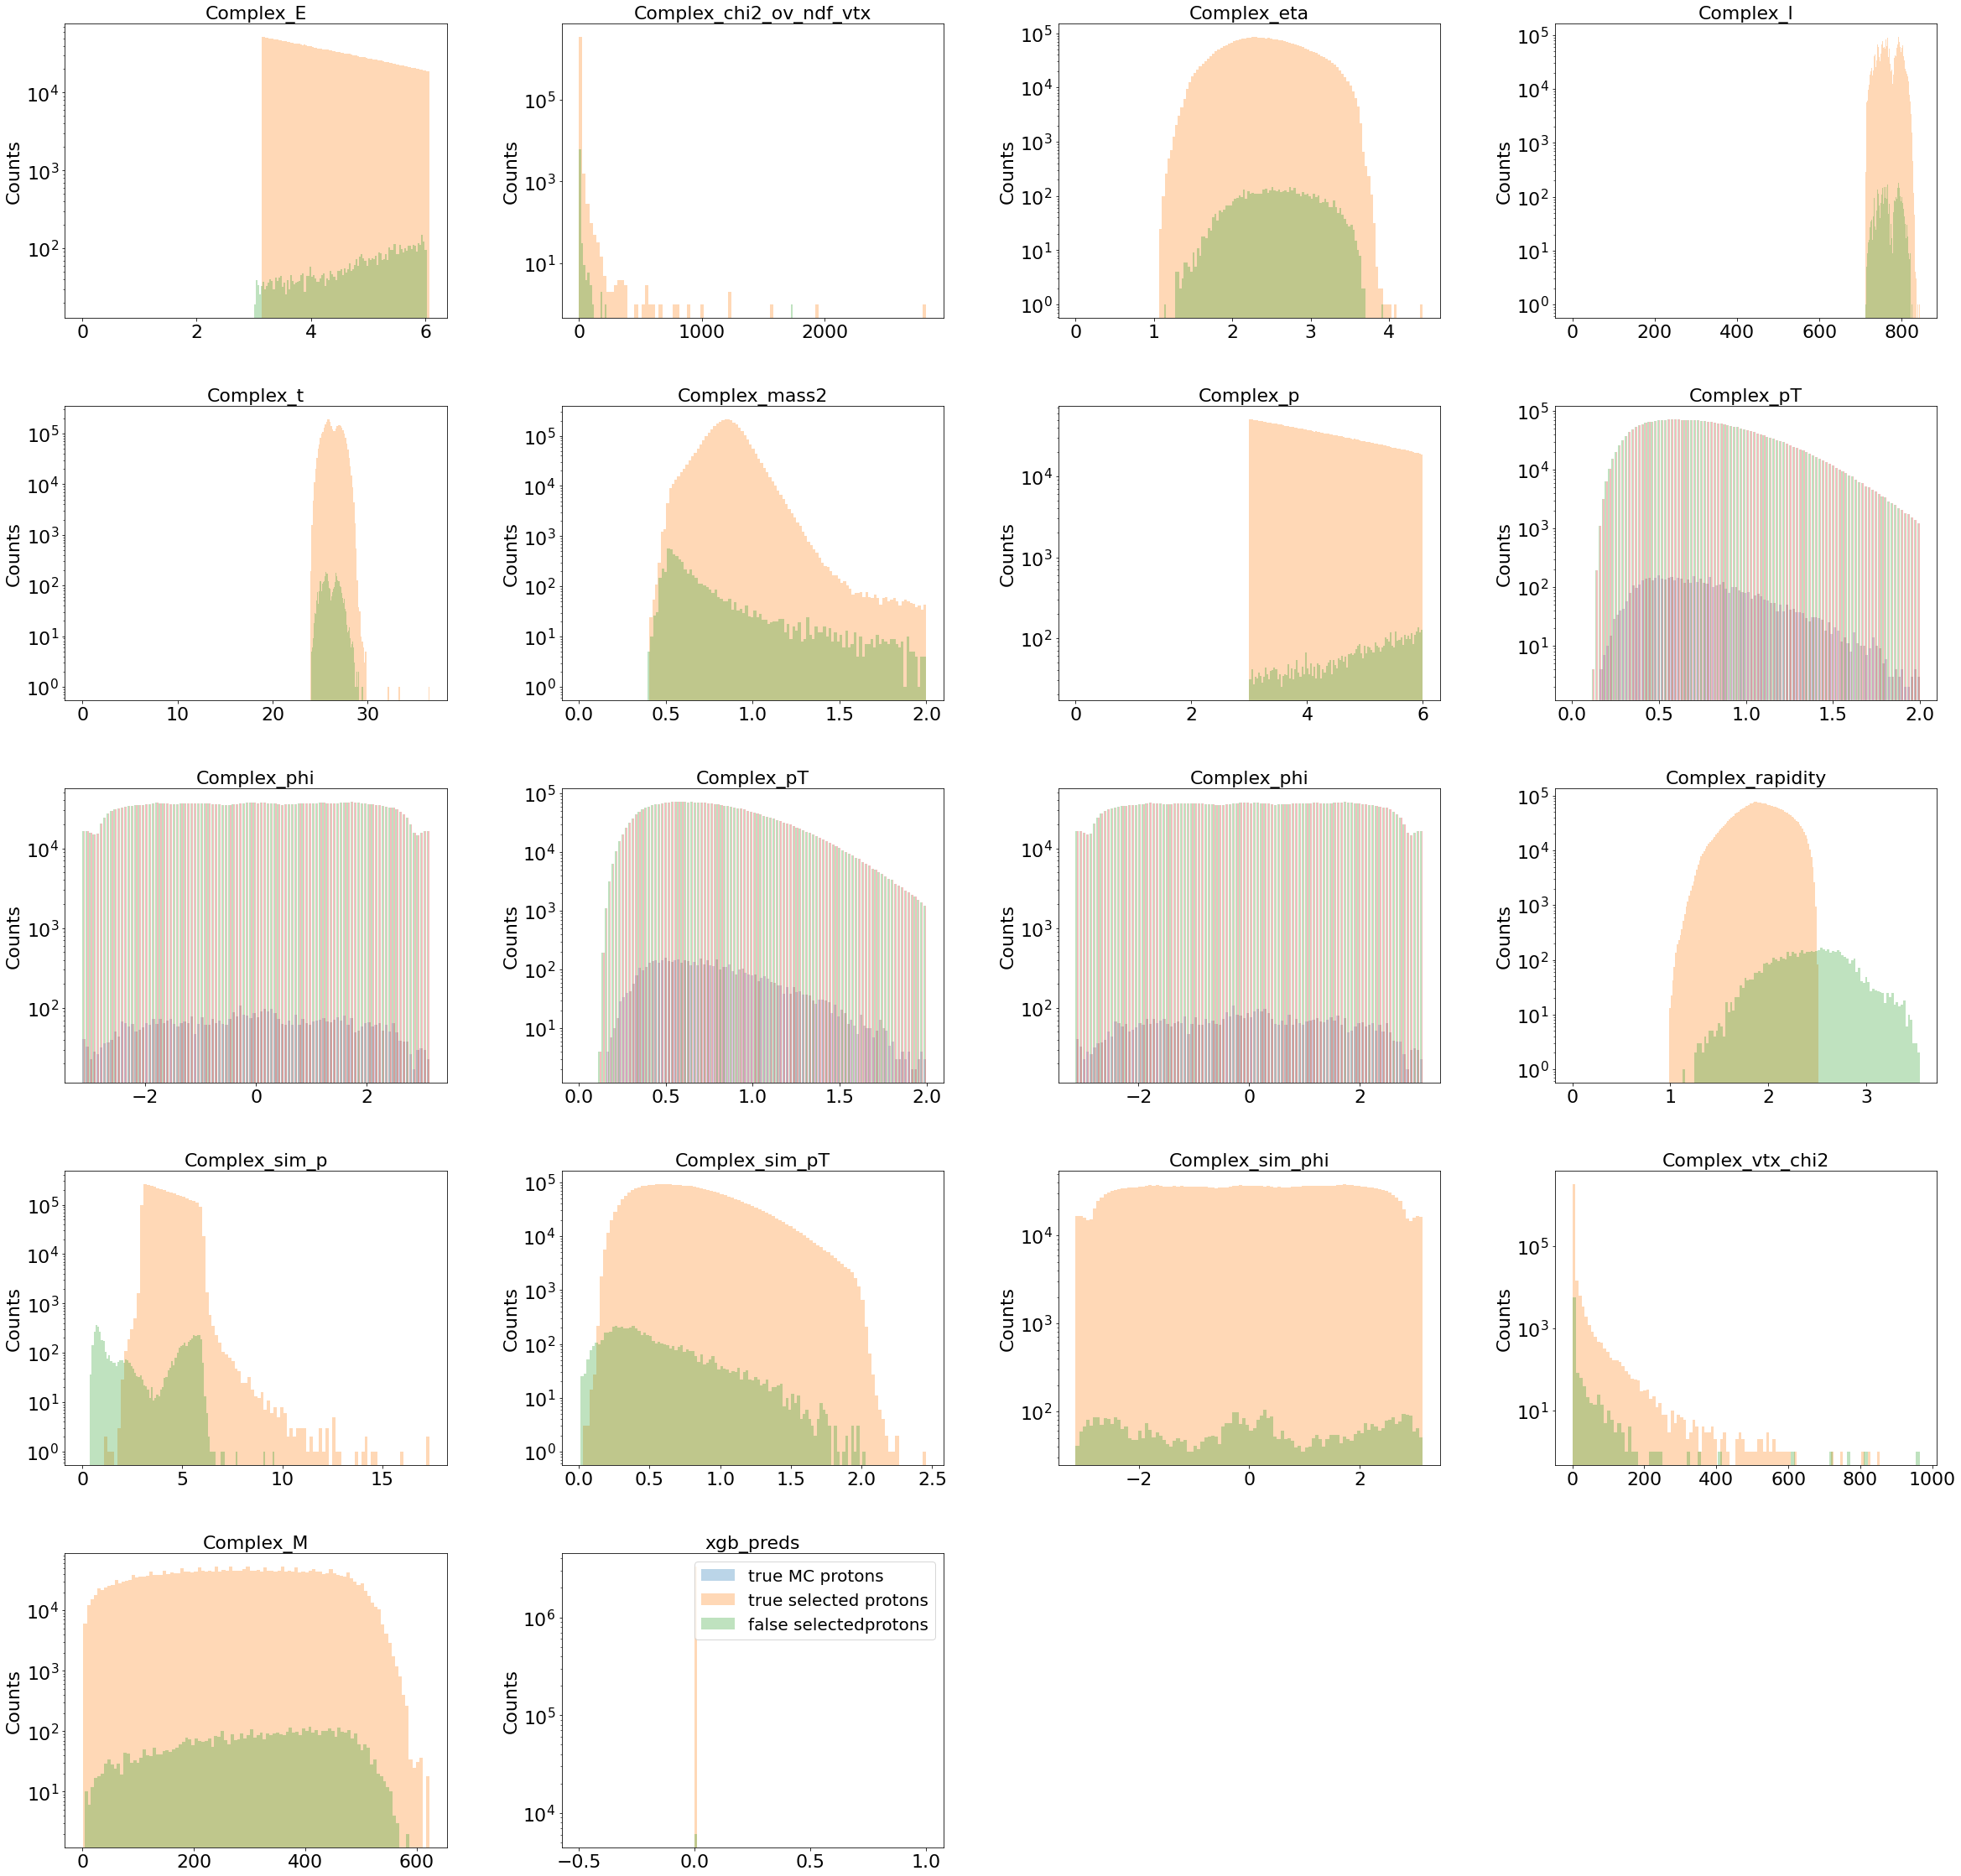

In [22]:
vars_to_draw = [
    "Complex_E",
    "Complex_chi2_ov_ndf_vtx",
    "Complex_eta",
    "Complex_l",
    "Complex_t",
    "Complex_mass2",
    "Complex_p",
    "Complex_pT",
    "Complex_phi",
    "Complex_pT",
    "Complex_phi",
    "Complex_rapidity",
    "Complex_sim_p",
    "Complex_sim_pT",
    "Complex_sim_phi",
    "Complex_vtx_chi2",
    "Complex_M",
    "xgb_preds",
]
particle_names = ["protons", "kaons", "pions", "bckgr"]
for pid in range(1):
    # try:
    plotting_tools.var_distributions_plot(
        vars_to_draw,
        [
            validate.particles_df[
                (validate.particles_df[pid_variable_name] == 5)
            ],
            validate.particles_df[
                (
                    (validate.particles_df[pid_variable_name] == pid)
                    & (validate.particles_df["xgb_preds"] == pid)
                )
            ],
            validate.particles_df[
                (
                    (validate.particles_df[pid_variable_name] != pid)
                    & (validate.particles_df["xgb_preds"] == pid)
                )
            ]
        ],
        [
            f"true MC {particle_names[pid]}",
            f"true selected {particle_names[pid]}",
            f"false selected{particle_names[pid]}"
        ],
        save_fig=False
    )
    # except:
    #     print(f"Error printing distributios for pid={pid}")

In [17]:
test_particles.get_data_frame().head(5)

,Complex_E,Complex_T,Complex_chi2_ov_ndf_vtx,Complex_eta,Complex_l,Complex_mass,Complex_mass2,Complex_mass2_over_p2,Complex_p,Complex_pT,...,Complex_t,Complex_vtx_chi2,Complex_M,Complex_id,Complex_mother_id,Complex_pid,Complex_q,model_output_0,model_output_1,model_output_2
4,3.260942,2.322670,1.291263,1.962085,745.262451,0.938272,0.842410,0.087102,3.123042,0.860970,...,25.919329,0.913177,75.0,4.0,-1.0,0.0,1.0,1.0,1.329019e-07,2.370844e-09
8,5.688423,4.750151,0.649048,2.156020,803.662659,0.938272,0.882386,0.028164,5.610508,1.282038,...,27.182178,1.230542,75.0,8.0,-1.0,0.0,1.0,1.0,1.904193e-07,3.447196e-09
17,3.503956,2.565684,4.069422,2.019851,797.643677,0.938272,0.896047,0.084470,3.375997,0.880326,...,27.707478,1.915188,75.0,17.0,-1.0,0.0,1.0,1.0,2.341987e-07,3.377048e-09
22,4.519657,3.581385,1.240610,2.597830,744.818542,0.938272,0.853698,0.043947,4.421193,0.654554,...,25.384521,1.134735,75.0,22.0,-1.0,0.0,1.0,1.0,1.023023e-07,1.484939e-09
24,4.447908,3.509636,1.110038,2.270028,784.908142,0.938272,0.870667,0.046704,4.347820,0.888853,...,26.786133,1.923310,75.0,24.0,-1.0,0.0,1.0,1.0,1.494511e-07,2.213911e-09


In [6]:
def plot_BDT(
    df: pd.DataFrame,
    pid: float,
    pid_var_name: str = "Complex_pid",
    ranges=[[0, 5], [0, 3]],
    nbins=50,
    save_fig: bool = True,
):
    df_true = df[(df[pid_var_name] == pid)]  # simulated
    df_reco = df[(df["xgb_preds"] == pid)]  # reconstructed by xgboost

    x = np.array(df_true[rapidity_var_name])
    y = np.array(df_true[pT_var_name])

    xe = np.array(df_reco[rapidity_var_name])
    ye = np.array(df_reco[pT_var_name])

    fig = plt.figure(figsize=(8, 10), dpi=300)
    plt.title(f"$p_T$-rapidity efficiency for all selected for pid = {pid}")
    true, yedges, xedges = np.histogram2d(x, y, bins=nbins, range=ranges)
    reco, _, _ = np.histogram2d(xe, ye, bins=(yedges, xedges), range=ranges)

    eff = np.divide(true, reco, out=np.zeros_like(true), where=reco != 0)  # Efficiency
    eff[eff == 0] = np.nan  # show zeros as white
    img = plt.imshow(
        eff,
        interpolation="nearest",
        origin="lower",
        vmin=0,
        vmax=1,
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    )

    cbar = fig.colorbar(img, fraction=0.025, pad=0.08)  # above plot H
    cbar.set_label("efficiency (selected/simulated)", rotation=270, labelpad=20)

    plt.xlabel("rapidity")
    plt.ylabel("$p_T$ (GeV/c)")
    plt.tight_layout()
    if save_fig:
        plt.savefig(f"plot_eff_pT_rap_ID={pid}.png")
        plt.savefig(f"plot_eff_pT_rap_ID={pid}.pdf")
        plt.close()
    else:
        plt.show()

KeyError: 1

In [15]:

import numpy as np
from sklearn.metrics import confusion_matrix
probas = np.linspace(.5, .95, 20)
efficienciesProtons, efficienciesKaons, efficienciesPions = [], [], []
efficiencies = [efficienciesProtons, efficienciesKaons, efficienciesPions]
puritiesProtons, puritiesKaons, puritiesPions = [], [], []
purities = [puritiesProtons, puritiesKaons, puritiesPions]
for proba in probas:
    validate.xgb_preds(proba, proba, proba)
    # confusion matrix
    cnf_matrix = confusion_matrix(
        validate.particles_df[pid_variable_name], validate.particles_df["xgb_preds"]
    )
    for pid in range(0, 3):
        efficiency, purity = validate.efficiency_stats(cnf_matrix, pid, pid_variable_name)
        efficiencies[pid].append(efficiency)
        purities[pid].append(purity)



        For particle ID = 0: 
        Efficiency: 98.58%
        Purity: 98.40%
        

        For particle ID = 1: 
        Efficiency: 84.31%
        Purity: 54.90%
        

        For particle ID = 2: 
        Efficiency: 89.24%
        Purity: 84.79%
        

        For particle ID = 0: 
        Efficiency: 98.55%
        Purity: 98.36%
        

        For particle ID = 1: 
        Efficiency: 83.75%
        Purity: 55.34%
        

        For particle ID = 2: 
        Efficiency: 88.71%
        Purity: 84.43%
        

        For particle ID = 0: 
        Efficiency: 98.51%
        Purity: 98.33%
        

        For particle ID = 1: 
        Efficiency: 83.11%
        Purity: 55.79%
        

        For particle ID = 2: 
        Efficiency: 88.14%
        Purity: 84.01%
        

        For particle ID = 0: 
        Efficiency: 98.48%
        Purity: 98.30%
        

        For particle ID = 1: 
        Efficiency: 82.38%
        Purity: 56.22%
        

        F

In [43]:
probas

array([0.5       , 0.52368421, 0.54736842, 0.57105263, 0.59473684,
       0.61842105, 0.64210526, 0.66578947, 0.68947368, 0.71315789,
       0.73684211, 0.76052632, 0.78421053, 0.80789474, 0.83157895,
       0.85526316, 0.87894737, 0.90263158, 0.92631579, 0.95      ])

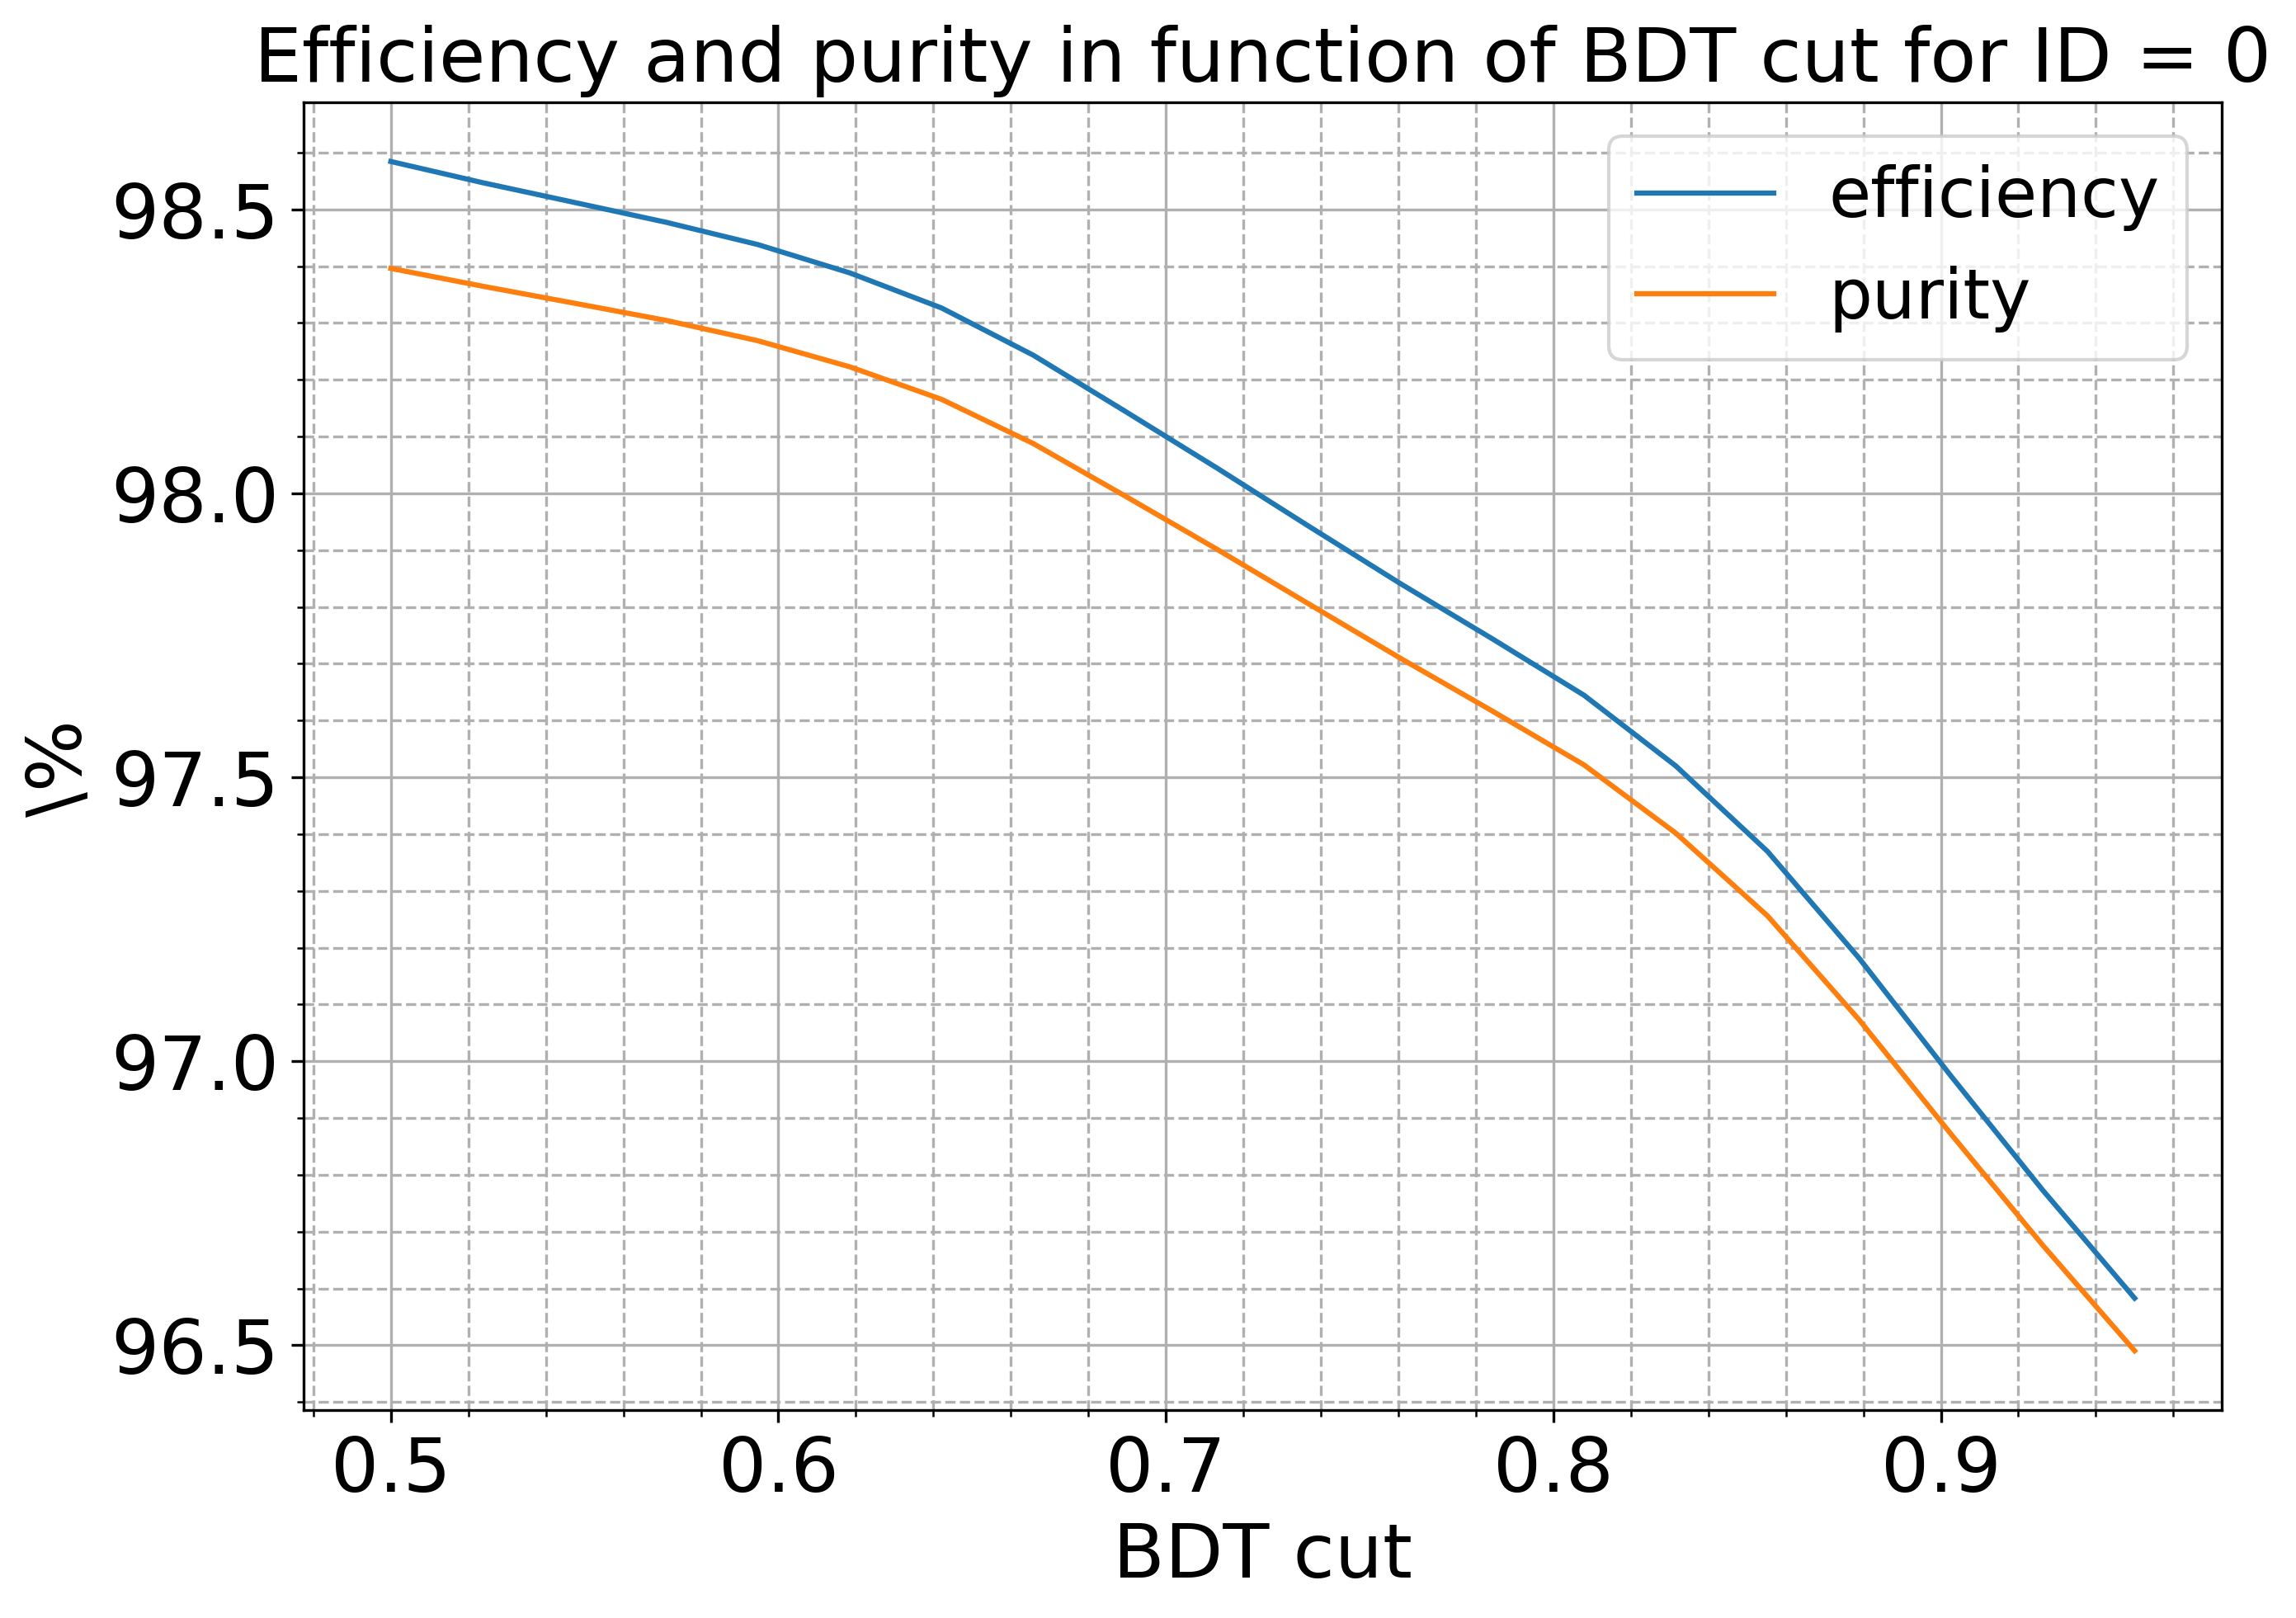

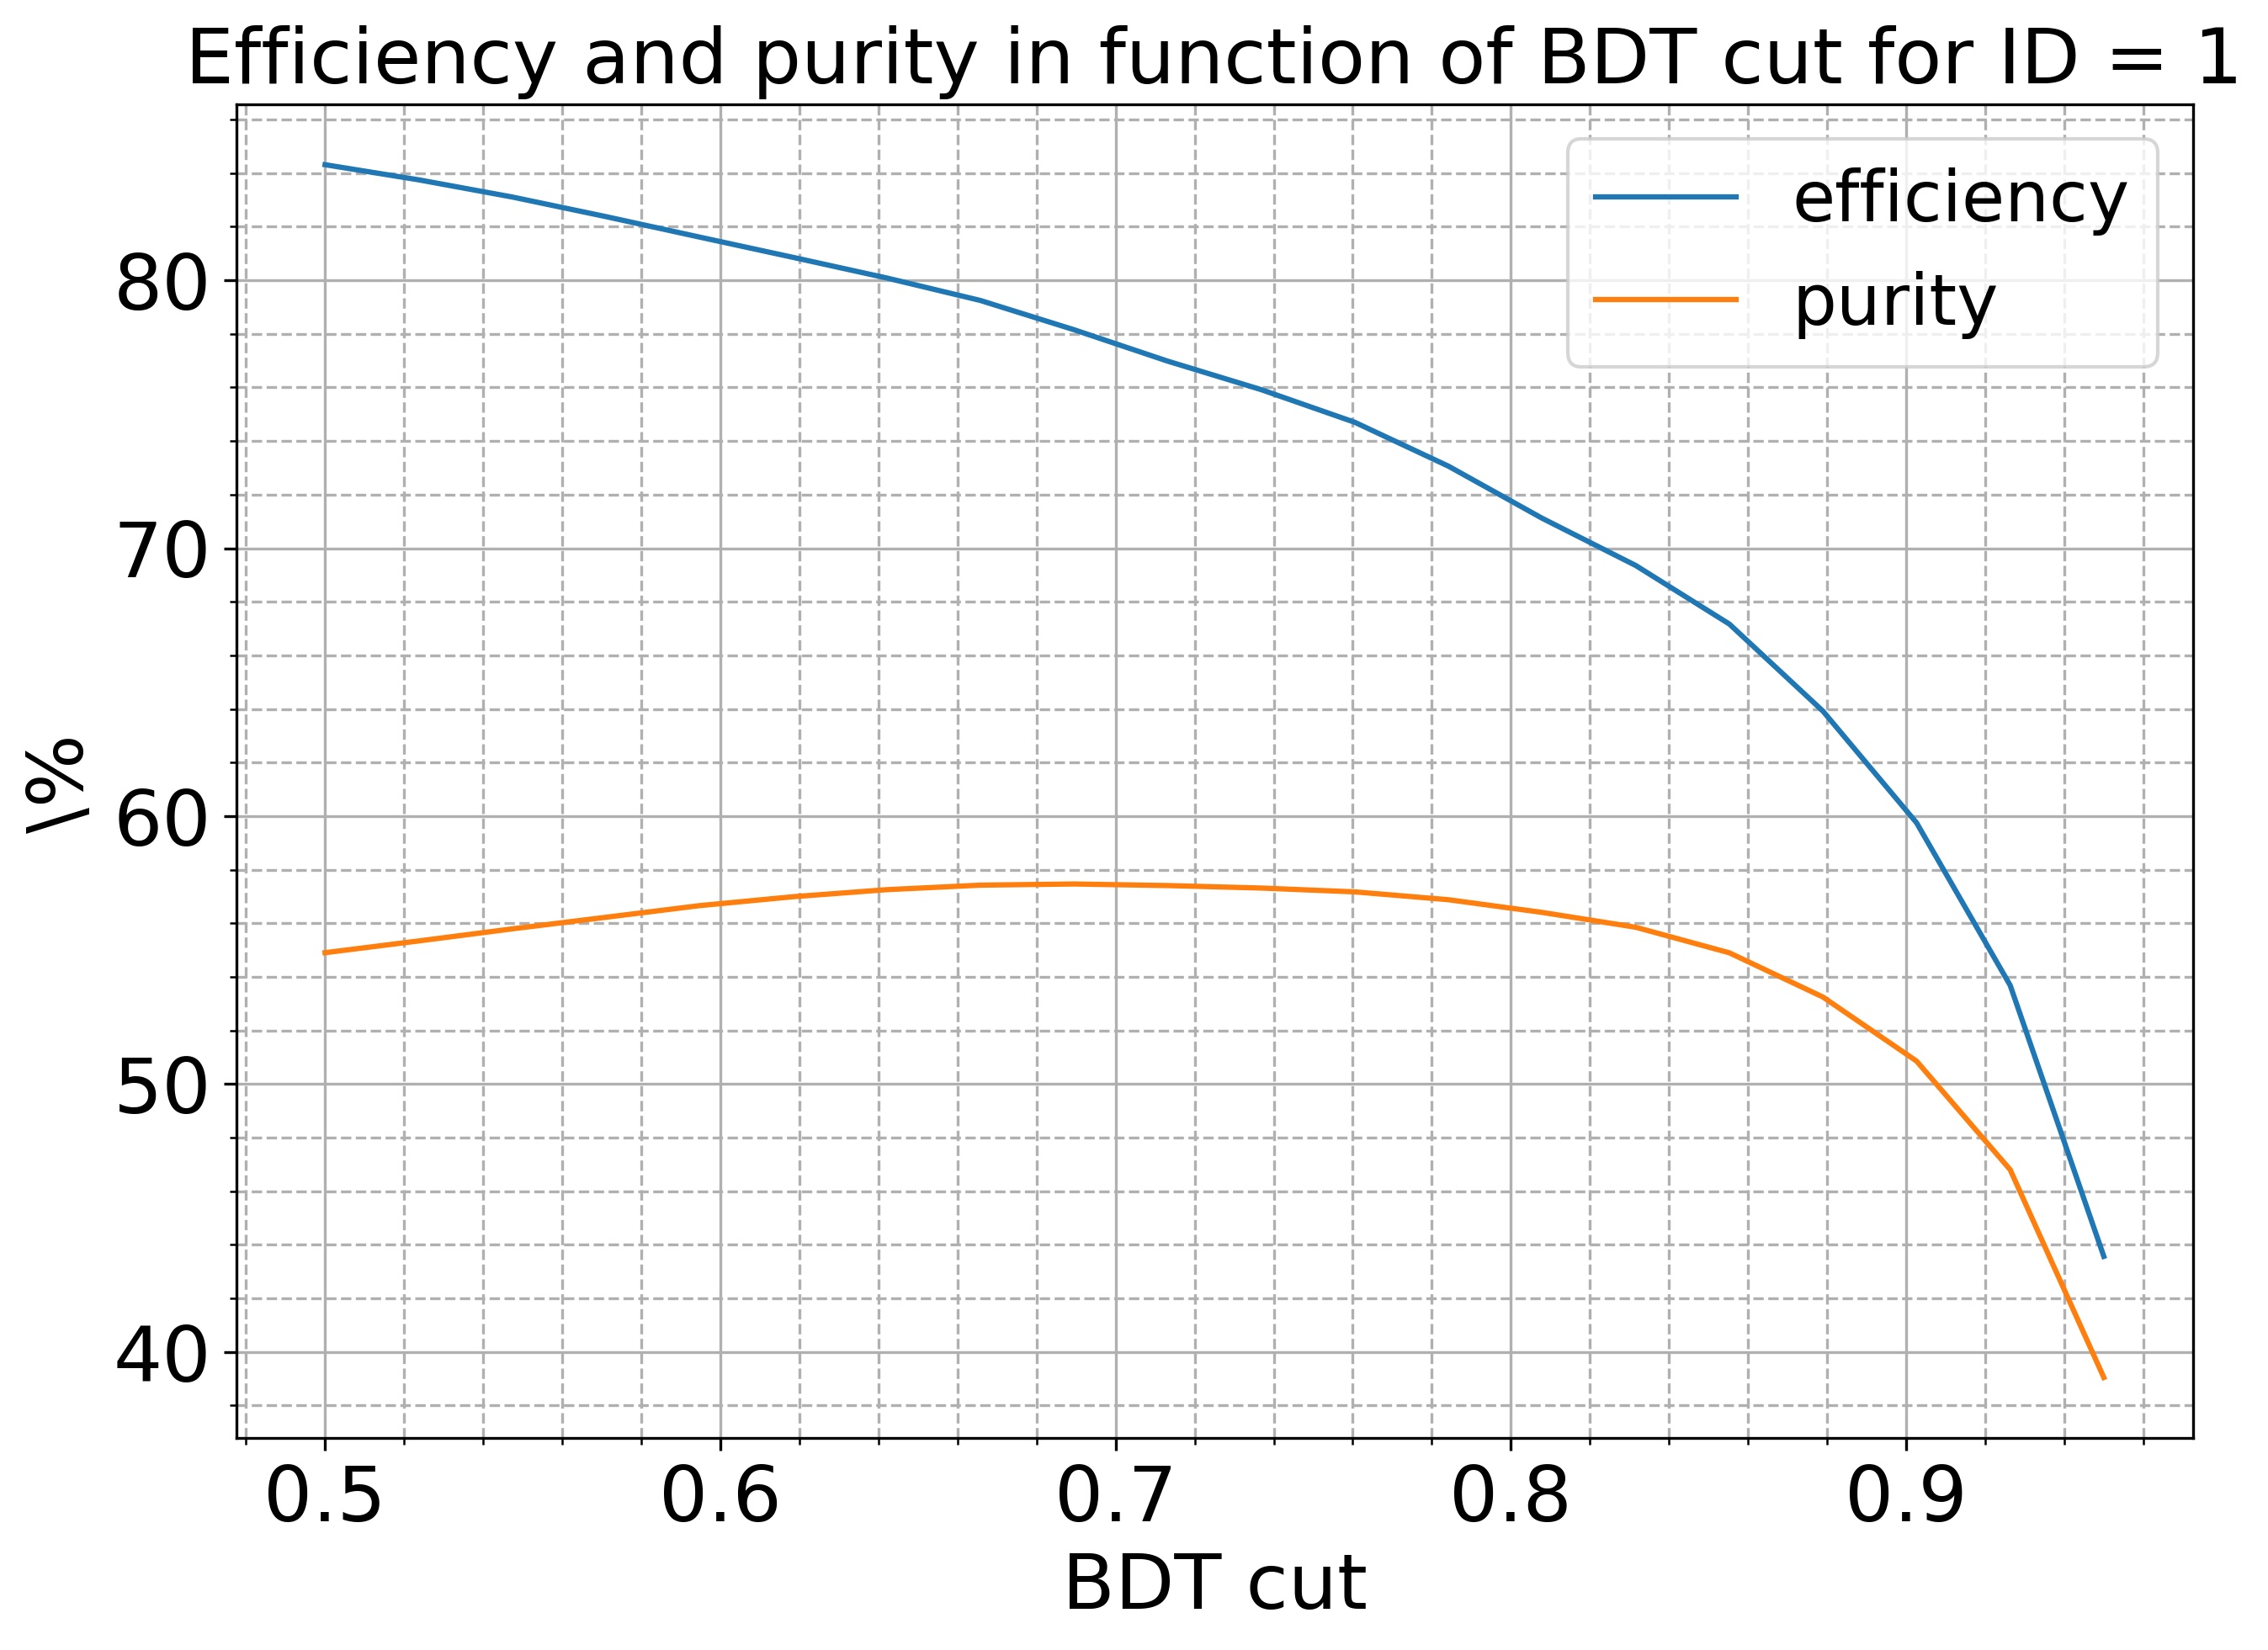

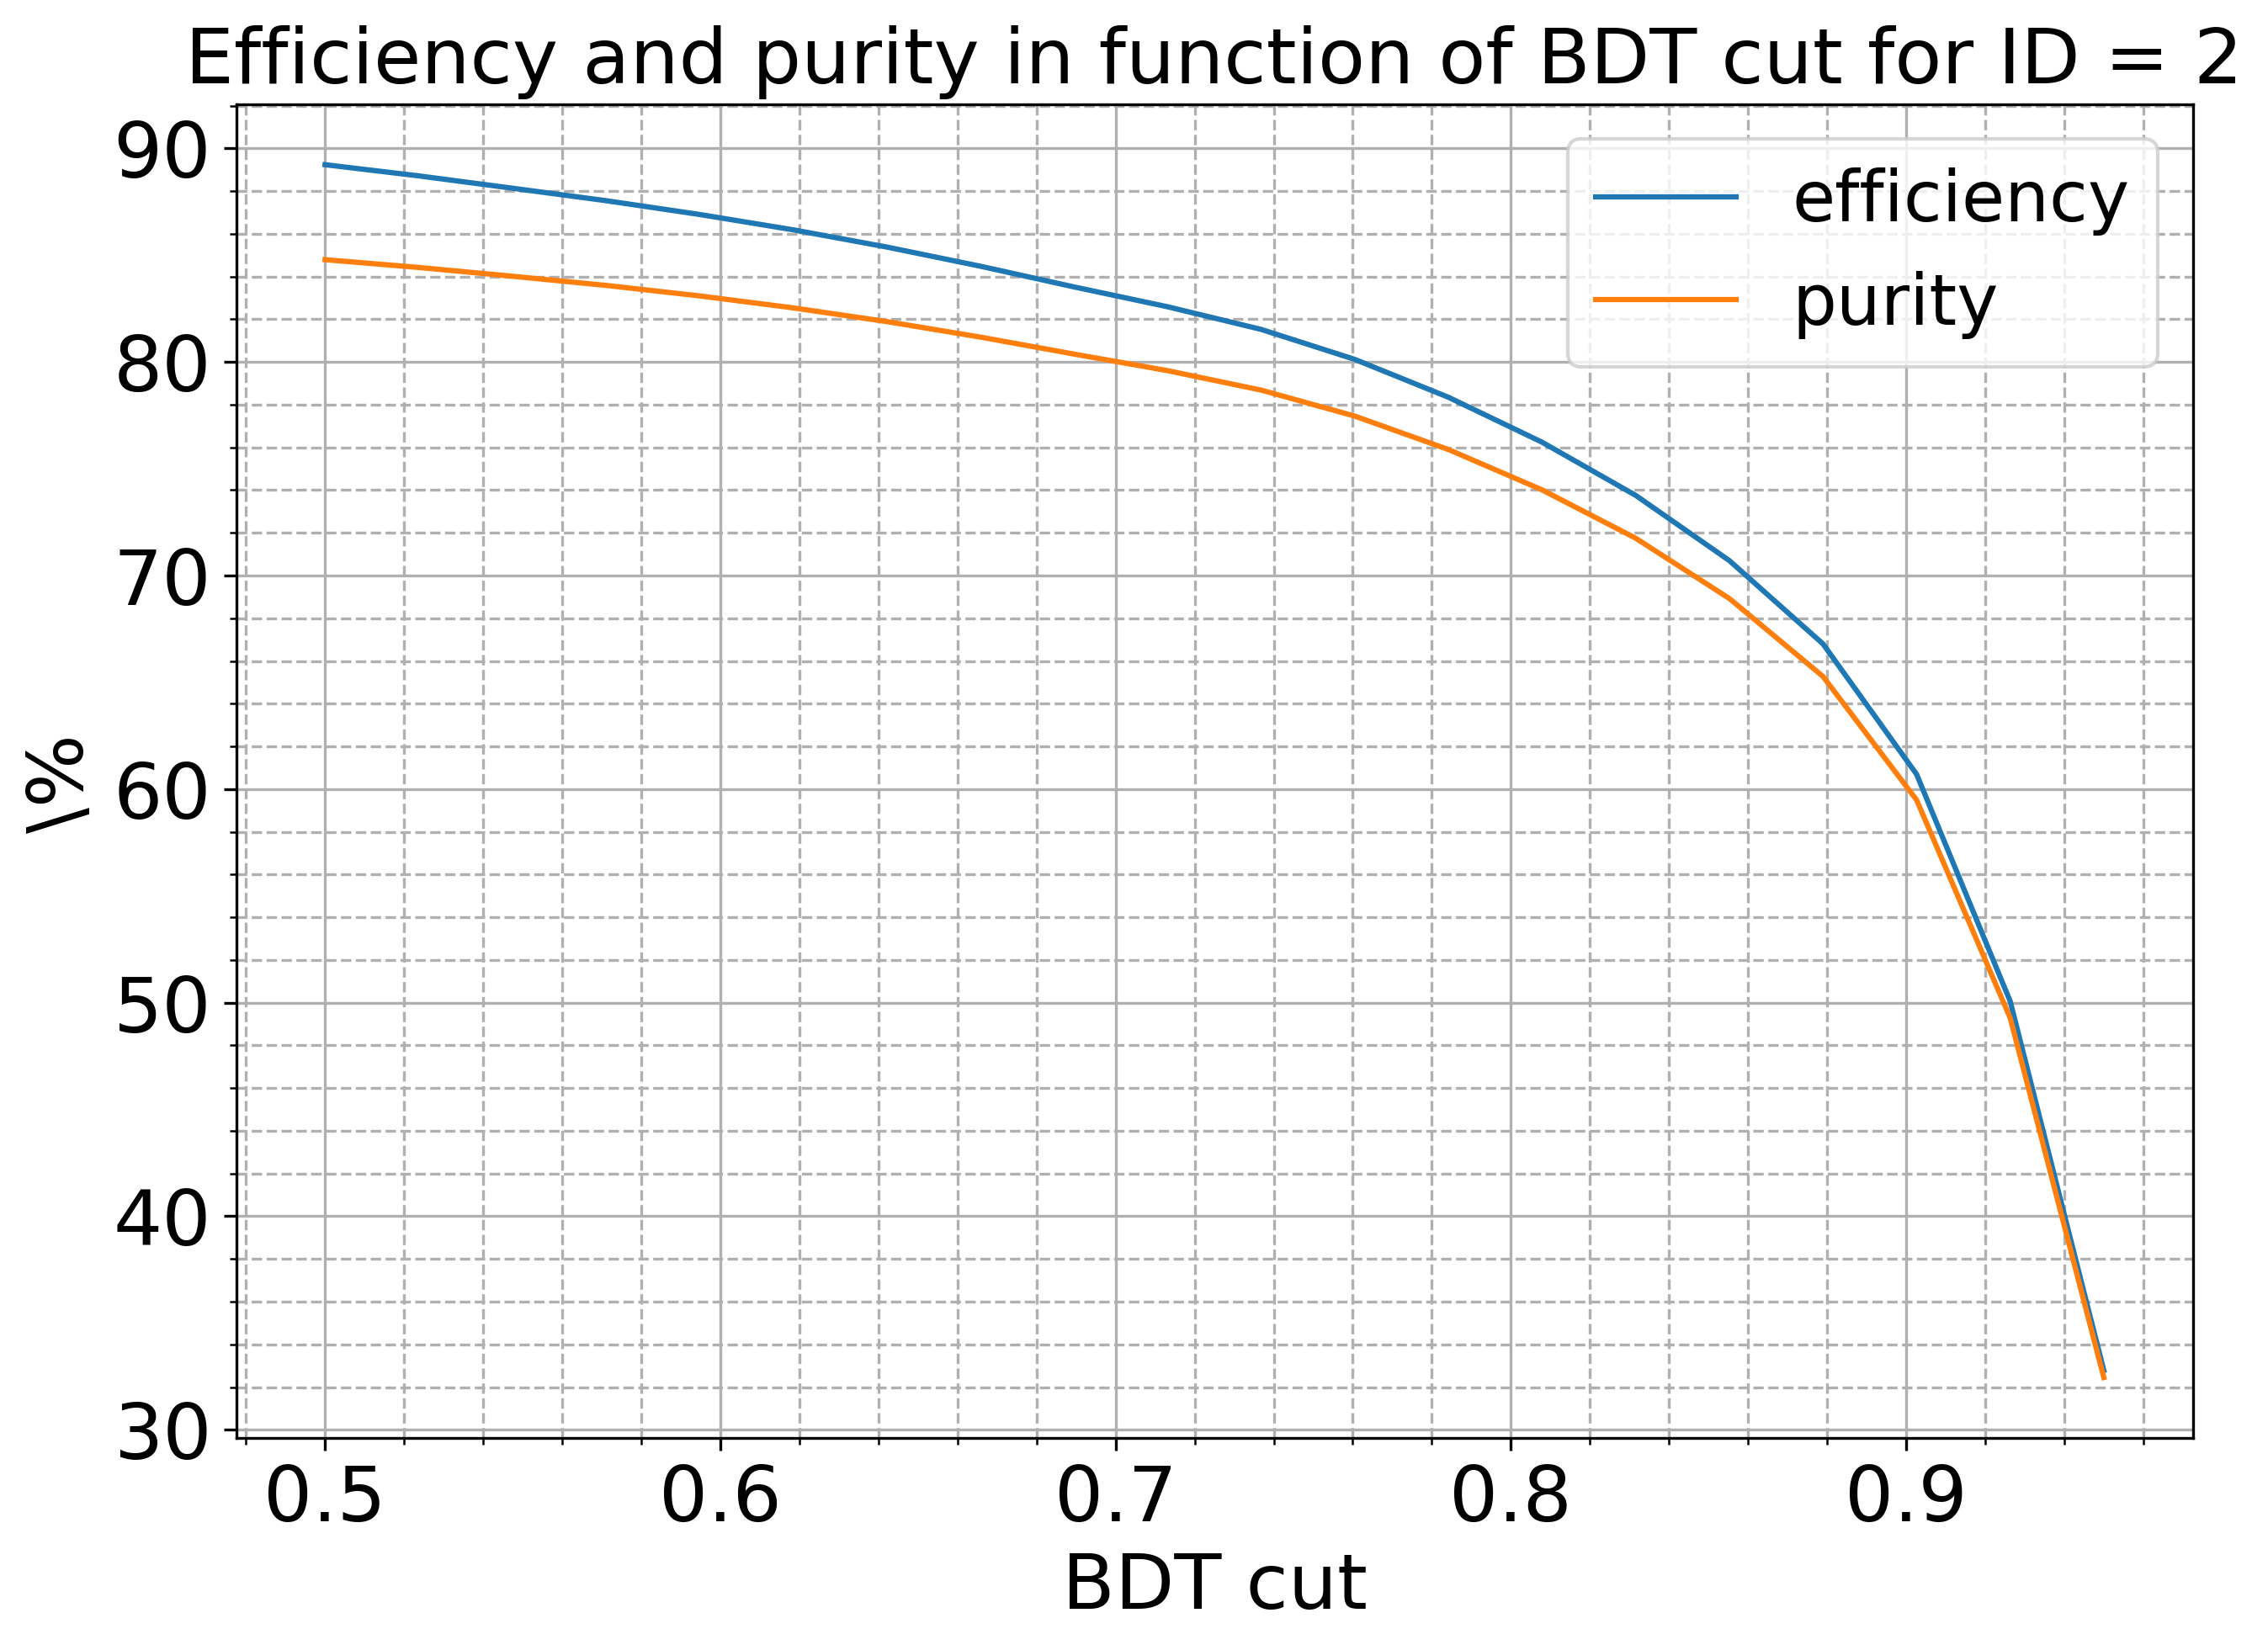

In [53]:
from importlib import reload
reload(plotting_tools)
plotting_tools.plot_efficiency_purity(probas, efficiencies, purities, False)
